In [97]:
import pandas as pd
import numpy as np
from preprocessing import Preprocessing

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Opdracht 1

## Statistieken en datatypes

### Importeer de dataset

In [98]:
df = pd.read_csv('/Users/jaspervos/Dropbox/Data/voorspel-verhuuraantallen-2023/train.csv', parse_dates=['date_hour'], index_col='date_hour')

display(df.head())

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
date_hour,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1


#### Toelichting

Ik heb de dataset geïmporteerd en de datums omgezet naar "DatetimeIndex" datatypen. Vervolgens gebruik ik deze kolom als indexwaarden. Hierdoor kan ik makkelijker met bepaalde tijdsintervallen werken.

### Datatypen

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16637 entries, 2011-01-01 00:00:00 to 2012-11-30 23:00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     16637 non-null  int64  
 1   weathersit  16637 non-null  int64  
 2   temp        16637 non-null  float64
 3   atemp       16637 non-null  float64
 4   hum         16637 non-null  float64
 5   windspeed   16637 non-null  float64
 6   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.0 MB


#### Toelichting

De dataset bevat geen missende waarden. Vrijwel alle datatypes zijn numeriek behalve de index. De index bevat het datatype “DatetimeIndex”. Dit is een datatype waarbij je makkelijker met tijd gerelateerde data kan werken.

### Basisstatistieken

In [100]:
df.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


#### Toelichting

Wat me opvalt is dat er veel kolommen mogelijk genormaliseerd zijn. Namelijk temp, atemp, hum, windspeed, cnt. De overige twee kolommen zijn wat anders. De kolom holiday heeft binaire waarden en bij weathersit gaat het om categorieën die ordinaal zijn opgesteld.

### Verdeling data

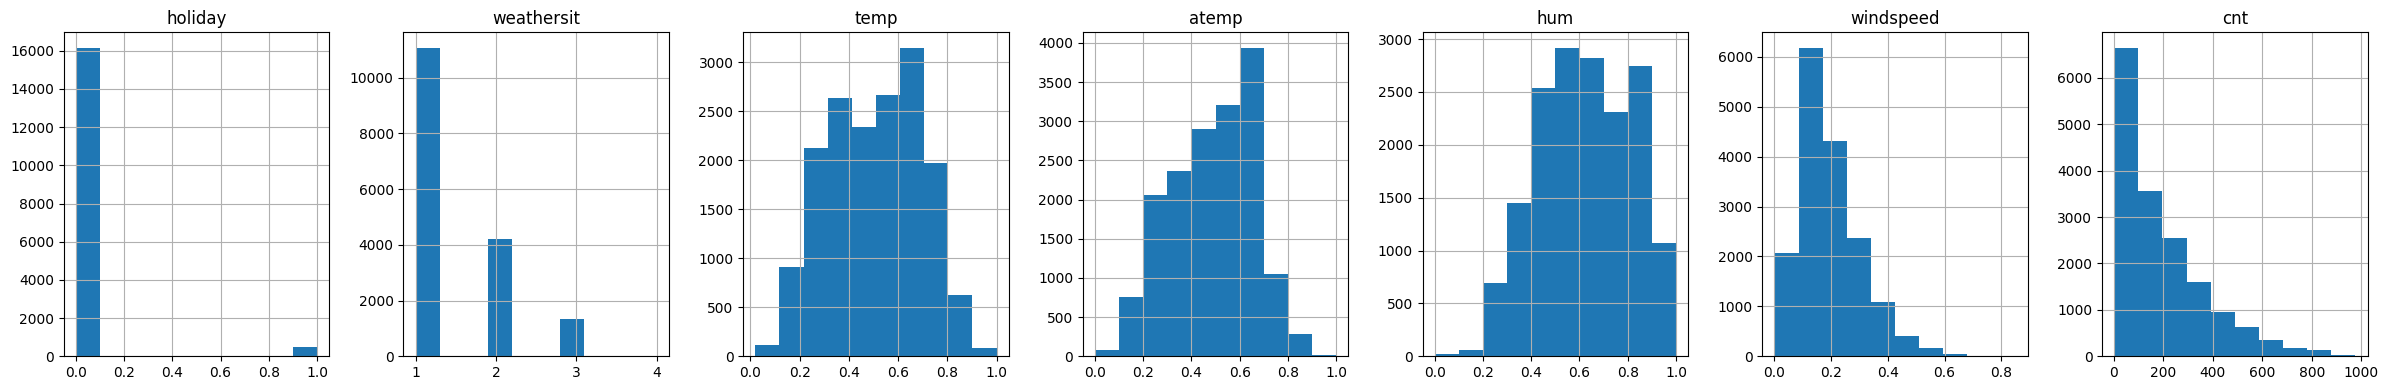

In [101]:
df.hist(layout=(1, df.shape[1]),figsize=(24, 4));

plt.tight_layout()

#### Toelichting

Het lijkt er inderdaad op dat veel kolommen genormaliseerd zijn. Daarnaast zie ik ook terug dat holiday en weathersit categoriaal zijn.

# Preprocessing

In deze sectie ga ik extra features toevoegen. Allereerst ga ik features toevoegen die zijn te extracteren vanuit de datums. Dit zorgt ervoor dat we goed kunnen kijken of er correlaties zijn in bijvoorbeeld specifieke maanden of weken.

In [102]:
df = Preprocessing.add_time_features(df, 'year', 'month', 'week_number', 'weekday',
                                     'is_weekend', 'hour', 'quarter',
                                     'week_of_month', 'day_number')

display(df.head())

,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,week_number,weekday,is_weekend,hour,quarter,week_of_month,day_number
date_hour,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,2011,1,52,5,1,0,1,1,1
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,2011,1,52,5,1,1,1,1,1
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2011,1,52,5,1,2,1,1,1
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,2011,1,52,5,1,3,1,1,1
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,2011,1,52,5,1,4,1,1,1


<Axes: >

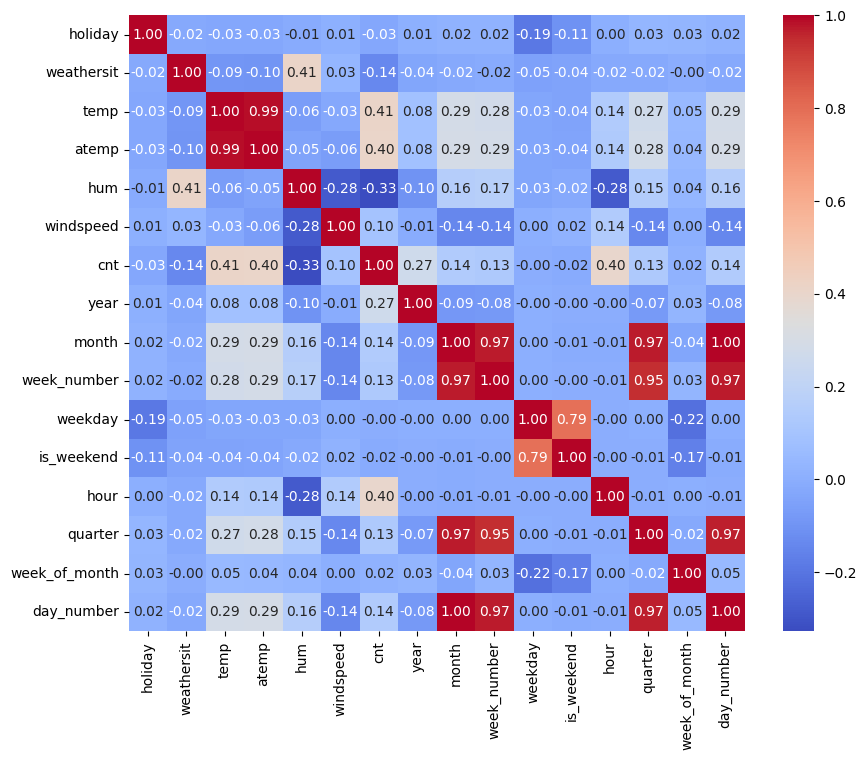

In [103]:


# Maak een heatmap met Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

## Create lag features

Om een goede voorspelling te doen is het soms goed om te kijken naar het verleden. Zo kun je bijvoorbeeld makkelijker voorspellen wat voor temperatuur het is morgen als je weet wat de temperatuur vandaag is. We kunnen dus voorspellingen maken op basis van uitkomsten in het verleden. We noemen dit "lag features". Het is alleen soms niet precies duidelijk welke "lags" we moeten gebruiken daar ga ik nu verder op in.

### Autocorrelatieplot

De eerste manier om je "lags" te vinden is door een acf plot te maken. Deze plot laat de directe correlaties zien tussen de huidige uitkomst en uitkomsten uit het verleden.

In [71]:
autocorrelation = acf(df['cnt'], nlags=14 * 7 * 24) 

[lag + 1 for lag, value in enumerate(autocorrelation) if value > .6]

[1,
 2,
 24,
 25,
 26,
 48,
 49,
 50,
 73,
 97,
 121,
 144,
 145,
 146,
 168,
 169,
 170,
 192,
 193,
 194,
 217,
 289,
 312,
 313,
 336,
 337,
 338,
 360,
 361,
 480,
 481,
 504,
 505,
 529,
 672,
 673]

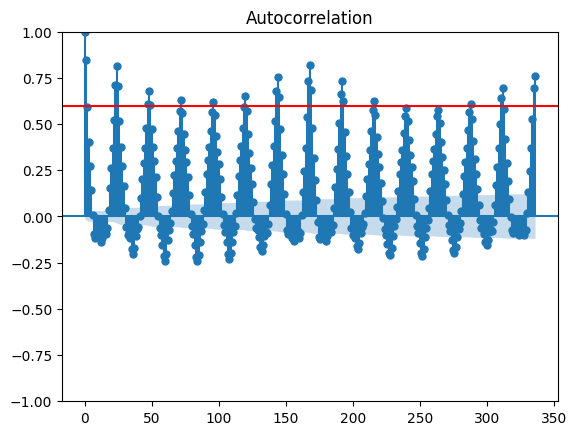

In [80]:
plot_acf(df['cnt'], lags=2*7*24)
plt.axhline(.6, color='red')
plt.show()

#### Toelichting

Hier zie je de autocorrelatie plot als je 2 weken terug in de tijd kijkt. Er treedt hier een duidelijk patroon op. Wanneer je slechts 1 dag teruggaat is er een vrij hoge correlatiewaarde. Naarmate je verder terugkijkt in de tijd zie je dat de correlatie daalt totdat wanneer je naar hetzelfde tijdstip op de vorige dag kijkt de correlatie weer toeneemt. Dit wijst op een dagelijkse periodiciteit. Naast dat we een dagelijkse periodiciteit hebben zien we ook dat er een wekelijkse periodiciteit is. 

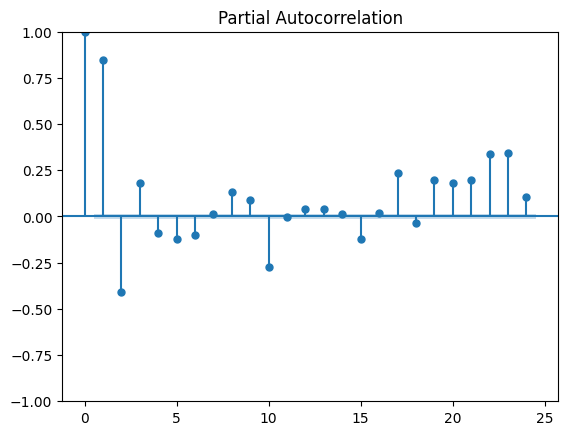

In [84]:
plot_pacf(df['cnt'], lags=24)
# plt.axhline(.6, color='red')
plt.show()

In [27]:
df = Preprocessing.create_lags(df, 'cnt', [1] + [i*24 for i in range(7, 12*7, 7)])

display(df.head())

,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,week_number,weekday,is_weekend,hour,minute,quarter,week_of_month,day_number,cnt_lag_1U,cnt_lag_168U,cnt_lag_336U,cnt_lag_504U,cnt_lag_672U,cnt_lag_840U,cnt_lag_1008U,cnt_lag_1176U,cnt_lag_1344U,cnt_lag_1512U,cnt_lag_1680U,cnt_lag_1848U
date_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,2011,1,52,5,1,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,2011,1,52,5,1,1,0,1,1,1,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2011,1,52,5,1,2,0,1,1,1,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,2011,1,52,5,1,3,0,1,1,1,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,2011,1,52,5,1,4,0,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create rolling features

In [28]:
df['rolling_24U'] = df['cnt'].rolling(window=24).mean()

display(df.head())

,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,week_number,weekday,is_weekend,hour,minute,quarter,week_of_month,day_number,cnt_lag_1U,cnt_lag_168U,cnt_lag_336U,cnt_lag_504U,cnt_lag_672U,cnt_lag_840U,cnt_lag_1008U,cnt_lag_1176U,cnt_lag_1344U,cnt_lag_1512U,cnt_lag_1680U,cnt_lag_1848U,rolling_24U
date_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,2011,1,52,5,1,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,2011,1,52,5,1,1,0,1,1,1,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2011,1,52,5,1,2,0,1,1,1,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,2011,1,52,5,1,3,0,1,1,1,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,2011,1,52,5,1,4,0,1,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cyclic features

In [29]:
def cyclic_function(data, *column_names):
    df = data.copy()
    
    for column_name in column_names:
        period = len(df[column_name].unique())
        df[f"{column_name}_cos"] = np.cos((2 * np.pi * df[column_name]) / period)
        df[f"{column_name}_sin"] = np.sin((2 * np.pi * df[column_name]) / period)
    
    return df

df = cyclic_function(df, 'month', 'weekday', 'week_number', 'hour', 'quarter', 'week_of_month', 'day_number')

<Axes: xlabel='date_hour'>

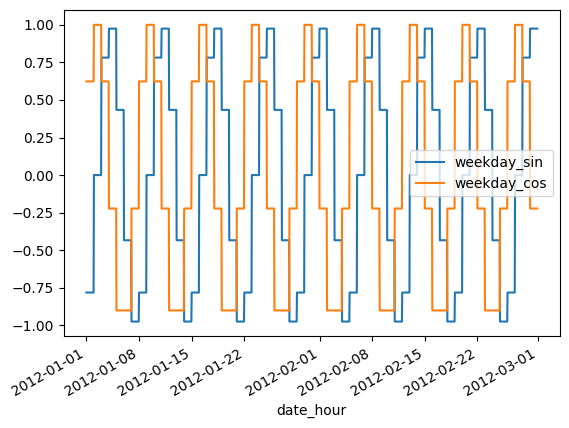

In [30]:
df[['weekday_sin', 'weekday_cos']].loc['2012-01':'2012-02'].plot()

## Radial basis features

<Axes: xlabel='date_hour'>

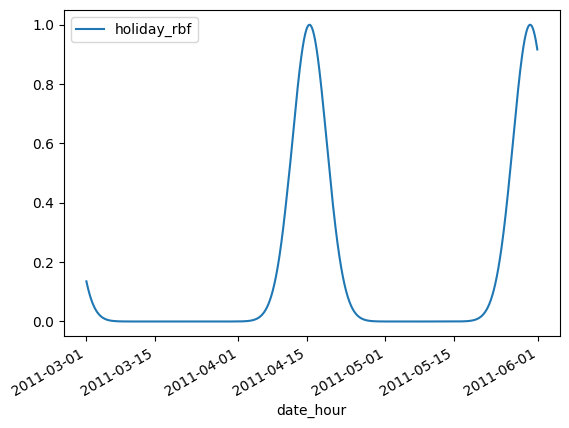

In [31]:
df['holiday_rbf'] = Preprocessing.radial_basis_function(df['holiday'], 7*24/2)

df[['holiday_rbf']].loc['2011-03':'2011-05'].plot()

## Drop the missing values

In [32]:
df = df.dropna()

# Predictions

In [33]:
X = df.drop(['cnt'], axis=1).copy()
y = df[['cnt']].copy()

linear_model = LinearRegression()
linear_model.fit(X, y)

y_predictions = linear_model.predict(X)
y_predictions[y_predictions < 0] = 0


In [34]:
mean_squared_error(y, y_predictions) ** (1/2)

77.29593227338741

<Axes: xlabel='date_hour'>

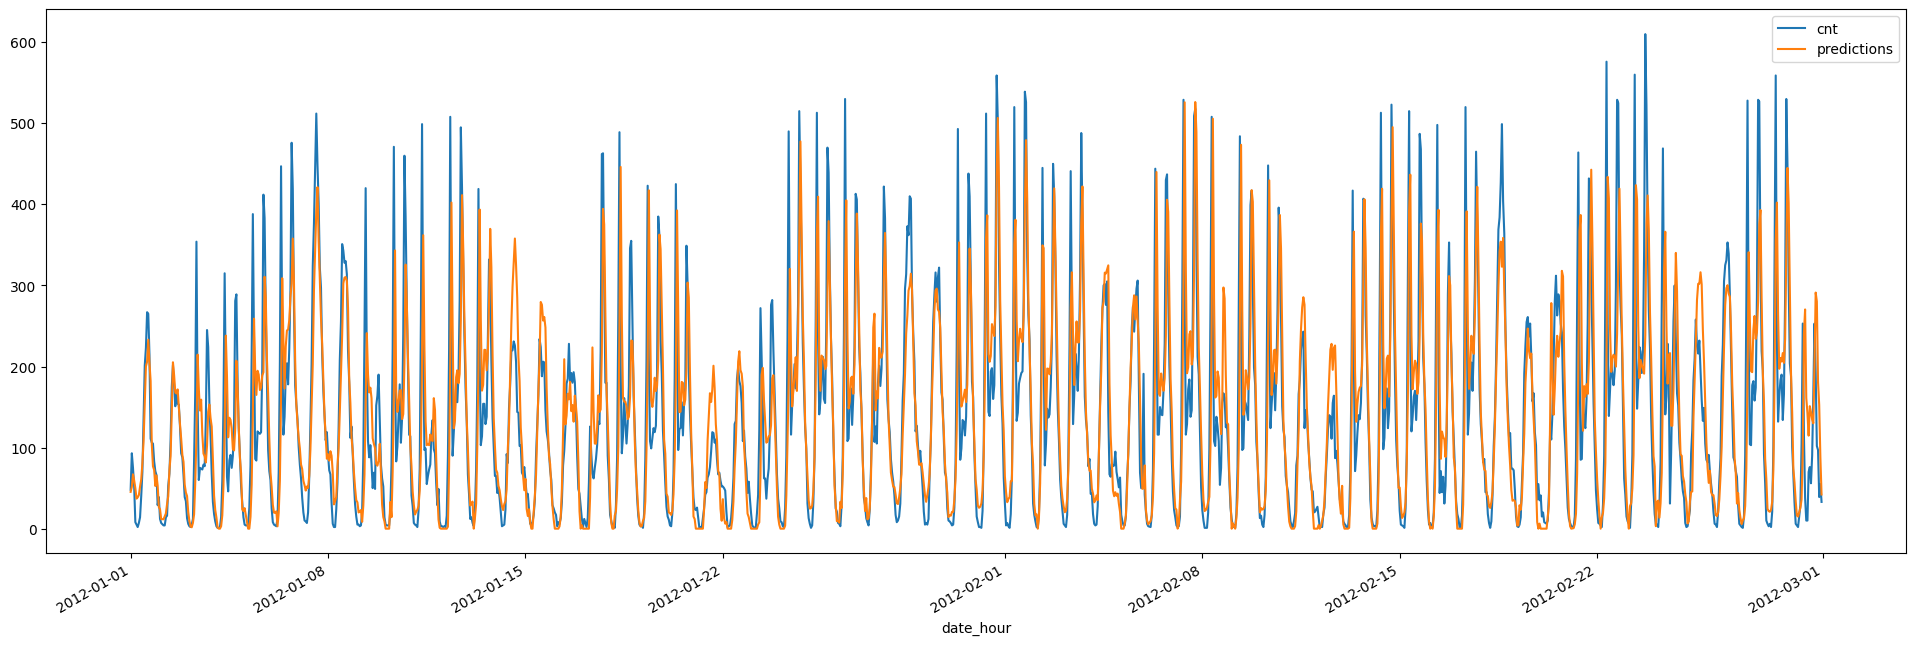

In [35]:
results = y.copy()
results['predictions'] = y_predictions

results.loc['2012-01':'2012-2'].plot(figsize=(24, 8))